pygame 2.1.2 (SDL 2.0.18, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Admin\AppData\Local\Temp\ipykernel_18604\740298698.py:84: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image_resized = image_file.resize((1300, 800), Image.ANTIALIAS)


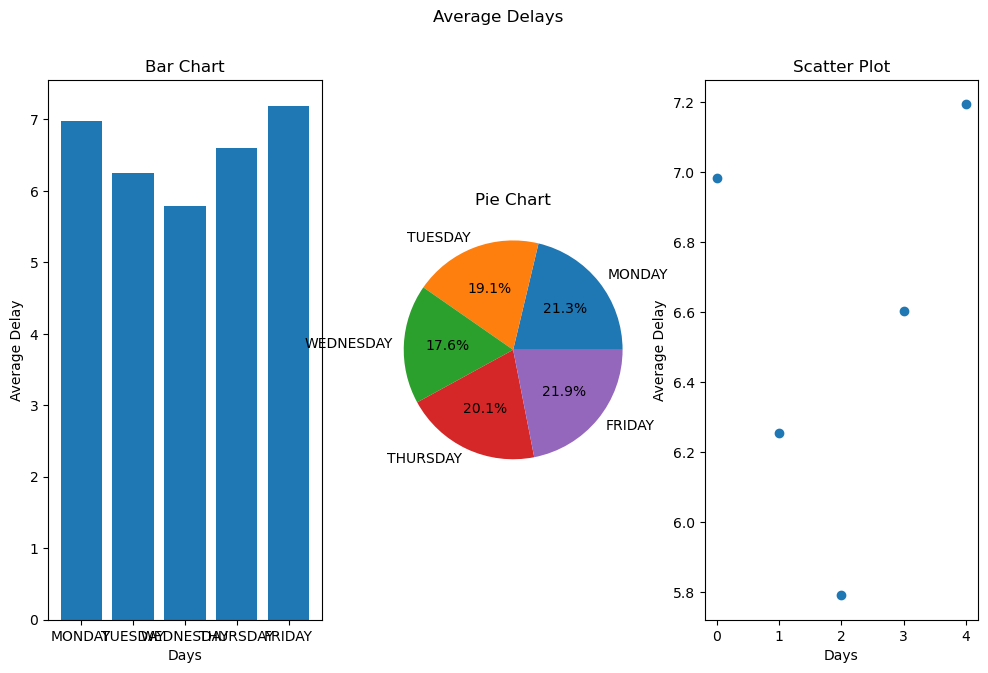

In [1]:
from tkinter import *
from tkinter import filedialog
from datetime import datetime
from PIL import Image, ImageTk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pygame
import numpy as np
pygame.mixer.init()

def calculate_delay(jobs):
    queue = []
    total_delay = 0
    for job in jobs:
        time, duration = job
        if not queue:
            queue.append((time + duration, duration))
            continue
        if queue[0][0] <= time:
            finish_time, job_duration = queue.pop(0)
            total_delay += (finish_time - time - job_duration)
        if duration <= 5:
            queue.insert(0, (time + duration, duration))
        else:
            queue.append((time + duration, duration))
    while queue:
        finish_time, job_duration = queue.pop(0)
        total_delay += (finish_time - job_duration)
    return total_delay / len(jobs)

def open_file(day):
    filename = f"{day}.txt"
    with open(filename) as f:
        jobs = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            time_str, duration = line.split()
            time = datetime.strptime(time_str, '%H:%M').time()
            time = time.hour + time.minute / 60  # Convert to decimal hours
            jobs.append((time, int(duration)))
        avg_delay = calculate_delay(jobs)
        input_text.delete(1.0, END)
        f.seek(0)  
        input_text.insert(END, f.read())  
        result_label.config(text=f"Average delay for {day}: {avg_delay:.1f}")
        pygame.mixer.Sound(r"C:\Users\Admin\Downloads\el_interface_button_22_hpx (1).mp3").play()
        return avg_delay

def plot_graph():
    avg_delays = []
    for day in days:
        avg_delay = open_file(day)
        avg_delays.append(avg_delay)
    fig, axs = plt.subplots(1, 3, figsize=(8, 2), dpi=100)
    fig.suptitle("Average Delays")
    
    axs[0].bar(days, avg_delays)
    axs[0].set_title("Bar Chart")
    axs[0].set_xlabel("Days")
    axs[0].set_ylabel("Average Delay")

    axs[1].pie(avg_delays, labels=days, autopct='%1.1f%%')
    axs[1].set_title("Pie Chart")
    
 
    x = np.arange(len(days))
    axs[2].scatter(x, avg_delays)
    axs[2].set_title("Scatter Plot")
    axs[2].set_xlabel("Days")
    axs[2].set_ylabel("Average Delay")
    
    canvas = FigureCanvasTkAgg(fig, master=graph_window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=RIGHT, fill=BOTH, expand=True)

opening_window = Tk()
opening_window.title("Welcome")
opening_window.geometry("950x800")
image_file = Image.open(r"C:\Users\Admin\OneDrive\Pictures\BACK.jfif")
opening_window.configure(background='light pink')

image_resized = image_file.resize((1300, 800), Image.ANTIALIAS)


image_tk = ImageTk.PhotoImage(image_resized)


image_label = Label(opening_window, image=image_tk)
image_label.pack()


open_button = Button(opening_window, text="Click to Enter", bg="white", font=30, command=lambda: [opening_window.destroy(), output_window.deiconify(), pygame.mixer.Sound(r"C:\Users\Admin\Downloads\el_interface_button_22_hpx (1).mp3").play()])

open_button.place(x=1050,y=500)

output_window = Tk()
output_window.title("Average Delays")
output_window.geometry("800x500")
output_window.withdraw()

output_window.configure(background='light blue')


frame = Frame(output_window ,bg="violet")
frame.pack(side=LEFT, padx=20)

input_text = Text(frame, width=30, height=20)
input_text.pack(side=TOP)


result_label = Label(frame, text="No file selected.")
result_label.pack(pady=10)


day_colors = {
    "MONDAY": "light pink",
    "TUESDAY": "orange",
    "WEDNESDAY": "yellow",
    "THURSDAY": "light green",
    "FRIDAY": "white"
}
graph_window = Toplevel(output_window)
graph_window.title("Average Delays Graph")
graph_window.geometry("1200x900")
graph_window.withdraw()

graph_button = Button(output_window, text="Graph", bg="pink", command=lambda: [graph_window.deiconify(), plot_graph()])
graph_button.pack(side=BOTTOM, pady=100)

days = ["MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY"]
for day in days:
    button = Button(output_window, text=day, bg=day_colors[day], width=10, command=lambda day=day: open_file(day))
    button.pack(side=TOP, pady=30)

output_window.mainloop()